In [3]:
pip install emnist

Note: you may need to restart the kernel to use updated packages.


In [2]:
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D
from keras import backend as K
from keras.datasets import mnist
from emnist import extract_training_samples, extract_test_samples
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
import numpy as np

In [3]:
x_train, y_train = extract_training_samples("letters")
x_test, y_test = extract_test_samples("letters")

In [6]:
x_train = np.reshape(x_train, (x_train.shape[0], 28, 28, 1))
x_test = np.reshape(x_test, (x_test.shape[0], 28, 28, 1))
print("Train data shape: ", x_train.shape)
print("Test data shape: ", x_test.shape)

Train data shape:  (124800, 28, 28, 1)
Test data shape:  (20800, 28, 28, 1)


In [7]:
# convert from integers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize to range 0-1
x_train /= 255
x_test /= 255

In [8]:
batch_size = 128
num_classes = 26
epochs = 10

# Input image dimensions
img_rows, img_cols = 28, 28

In [9]:
y_train = y_train-1
y_test = y_test-1

# Convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
input_shape = (img_rows, img_cols, 1)

In [10]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(26,activation ="softmax"))

In [11]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data = (x_test, y_test))

Epoch 1/10
1032/3900 [======>.......................] - ETA: 7s - loss: 0.7739 - accuracy: 0.7592

KeyboardInterrupt: 

In [ ]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9204807877540588, 0.934374988079071, 0.9362499713897705, 0.9400961399078369, 0.9376442432403564, 0.9381730556488037, 0.9385096430778503, 0.9393269419670105, 0.9376922845840454, 0.9398077130317688]
The training accuracy is : [0.8638221025466919, 0.9267147183418274, 0.9380208253860474, 0.9444230794906616, 0.9487259387969971, 0.9521955251693726, 0.9546313881874084, 0.9570352435112, 0.9589903950691223, 0.961097776889801]
The validation loss is : [0.24203859269618988, 0.2017875760793686, 0.18854817748069763, 0.18177653849124908, 0.19401834905147552, 0.18973468244075775, 0.19067370891571045, 0.2046726644039154, 0.2070893943309784, 0.19953563809394836]
The training loss is : [0.4208680987358093, 0.2127622365951538, 0.1796233206987381, 0.1582309603691101, 0.1422705054283142, 0.12964099645614624, 0.1207946240901947, 0.11202141642570496, 0.10543123632669449, 0.10031339526176453]


In [ ]:
model.summary()
model.save(r'model_letter.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [ ]:
img = cv2.imread(r'bbb.png')
img_copy = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))

In [ ]:
img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))

In [ ]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

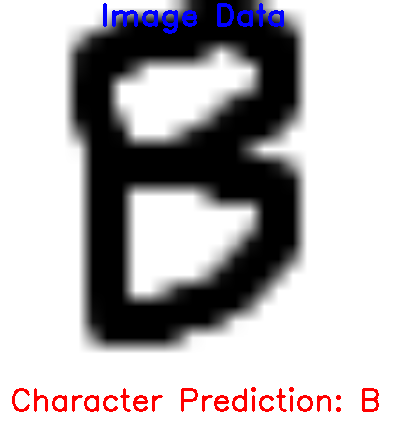

In [ ]:
img_pred = word_dict[np.argmax(model.predict(img_final))]
cv2.putText(img, "Image Data", (100,25), cv2.FONT_HERSHEY_DUPLEX , fontScale= 1, thickness=2, color = (255,0,0))
cv2.putText(img, "Character Prediction: " + img_pred, (10,410), cv2.FONT_HERSHEY_SIMPLEX, fontScale= 1, thickness=2, color = (0,0,255))
cv2_imshow(img)